# Basic Concepts in Markov Nets

### A. Pairwise Markov Nets

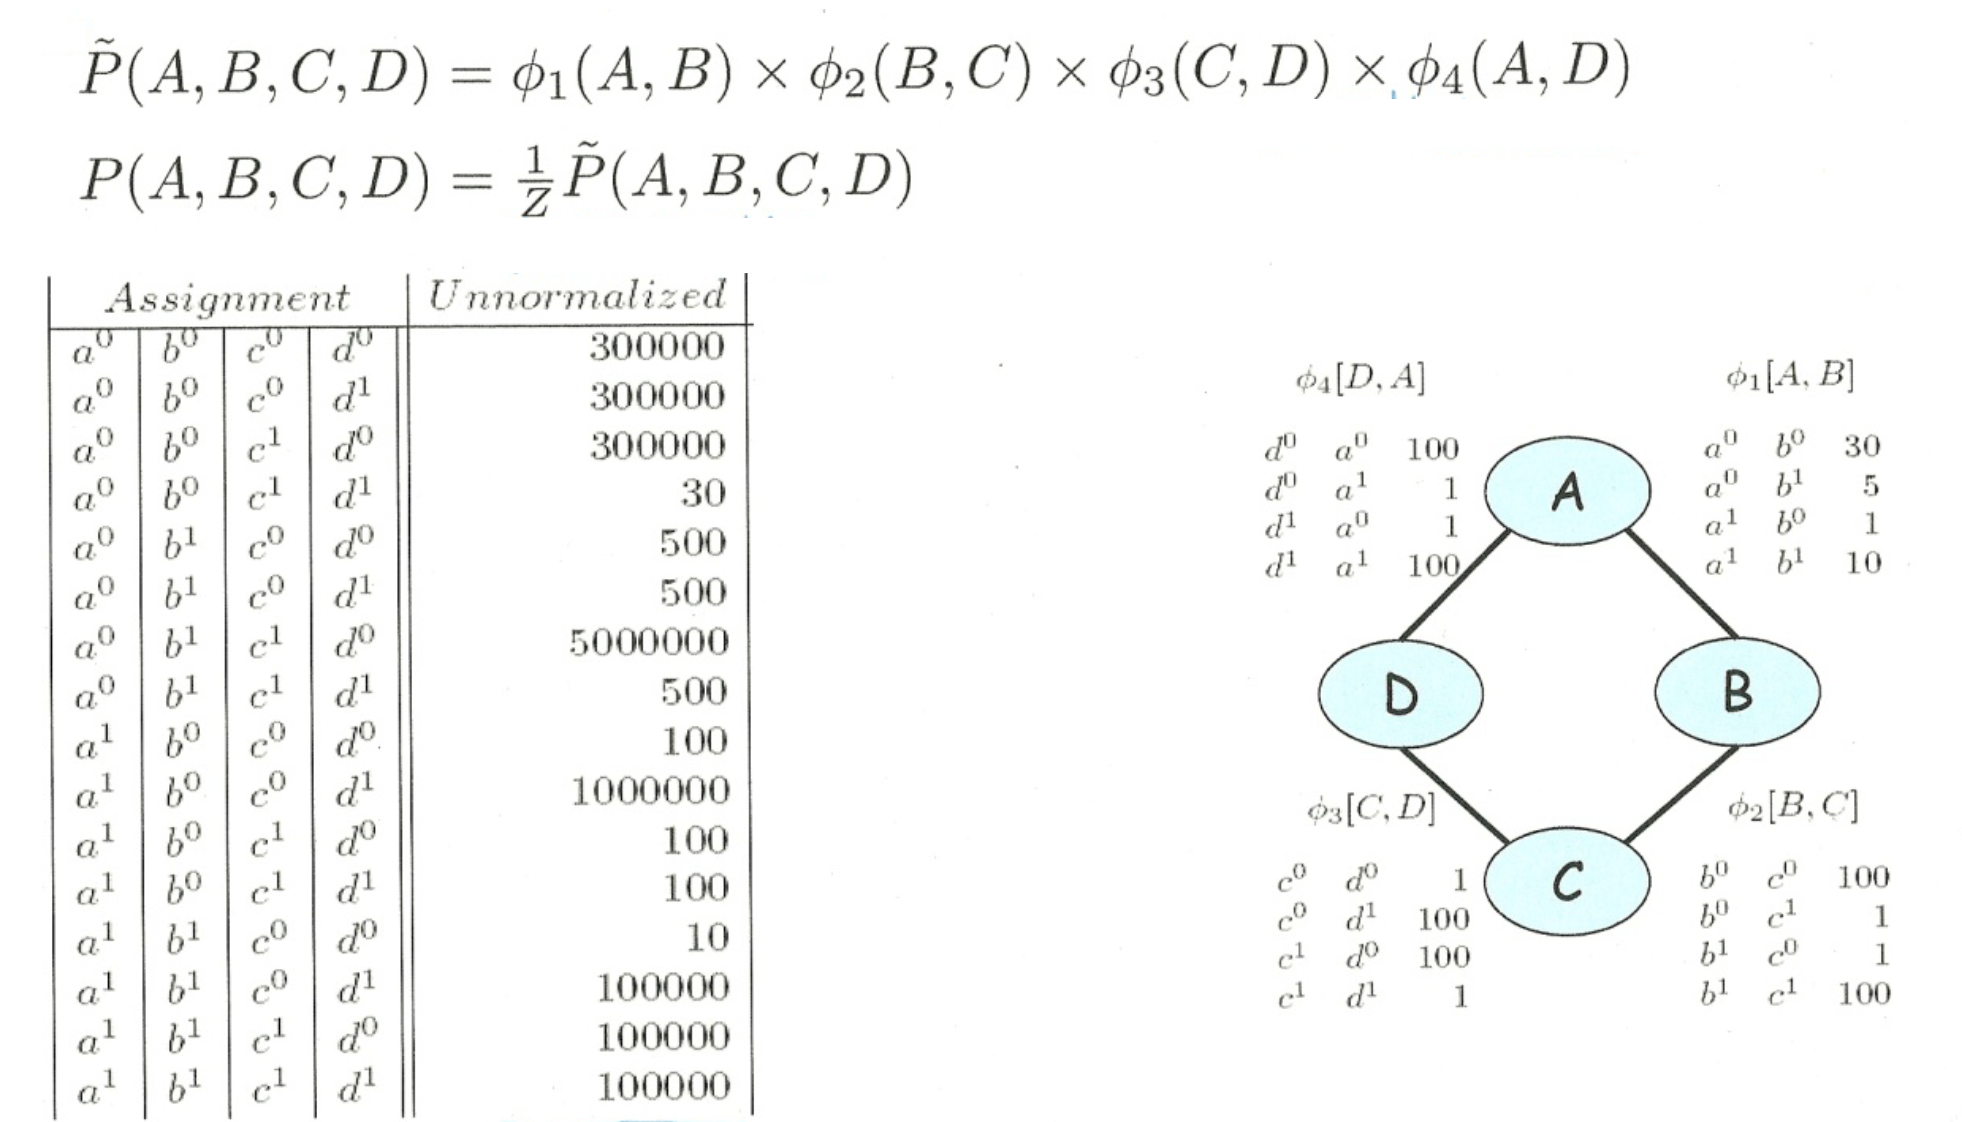

Fig 1. Structure and Normalization


In [3]:
from IPython.display import Image, display
display(Image(filename="/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/PGM/FIGS/pairwise_markov_net.png",width="50%"))
print "Fig 1. Structure and Normalization"

### B. Gibbs Distribution

* GD is a generalization of Pairwise Markov Nets. 
    * A Pairwise Markov Net can have $O(n^2d^2)$ parameters (i.e. $C_n^2 \cdot d^2$ parameters).
    * The total number of possible parameters would be $d^n$, which is the upperbound for GD.
* In a GD Net, a factor can be over more than 2 variables (with the total number of variables as the upperbound).
* Normalization of GD:
    * $\Phi = \{\phi_1(D_1),...,\phi_k(D_k)\}$
    * $ \tilde{P}_\Phi(X_1,...,X_n) = \prod_{i=1}\phi_i(D_i) $
    * $ Z_\Phi = \sum_{X_1,...,X_n} \tilde{P}_\Phi(X_1,...,X_n) $
    * $ P_\Phi(X_1,...,X_n) = \frac{1}{Z_\Phi}\tilde{P}_\Phi(X_1,...,X_n) $

### C. Independencies in MN

# Representing Markov Nets (pgmpy)

### A. Factor

In [4]:
from pgmpy.factors import Factor

In [24]:
# REPRESENTATION
phiAB = Factor(['A','B'],[2,2],[30,1,5,10])
print phiAB

+-----+-----+------------+
| A   | B   |   phi(A,B) |
|-----+-----+------------|
| A_0 | B_0 |    30.0000 |
| A_0 | B_1 |     1.0000 |
| A_1 | B_0 |     5.0000 |
| A_1 | B_1 |    10.0000 |
+-----+-----+------------+


In [25]:
# FACTOR MARGINALIZATION
print phiAB.marginalize(['A'],inplace=False) 
    # if inplace=True, original factor modified; otherwise return new.
    # after marginalization, can use .scope() to check remaining variables.
print phiAB.marginalize(['B'],inplace=False)

+-----+----------+
| B   |   phi(B) |
|-----+----------|
| B_0 |  35.0000 |
| B_1 |  11.0000 |
+-----+----------+
+-----+----------+
| A   |   phi(A) |
|-----+----------|
| A_0 |  31.0000 |
| A_1 |  15.0000 |
+-----+----------+


In [28]:
# FACTOR REDUCTION
#  removal of certain variables in a factor such that 
#  the factor no long depends on the variable(s).
phiAB = Factor(['A','B'],[2,2],[30,1,5,10])
print phiAB
print phiAB.reduce([('B',0)],inplace=False)

+-----+-----+------------+
| A   | B   |   phi(A,B) |
|-----+-----+------------|
| A_0 | B_0 |    30.0000 |
| A_0 | B_1 |     1.0000 |
| A_1 | B_0 |     5.0000 |
| A_1 | B_1 |    10.0000 |
+-----+-----+------------+
+-----+----------+
| A   |   phi(A) |
|-----+----------|
| A_0 |  30.0000 |
| A_1 |   5.0000 |
+-----+----------+


In [33]:
# FACTOR PRODUCT
phiAB = Factor(['A','B'],[2,2],[30,1,5,10])
phiBC = Factor(['B','C'],[2,2],[100,1,1,100])
print phiAB
print phiBC
print phiAB * phiBC
print "Scope after multiplication: ", (phiAB * phiBC).scope()

+-----+-----+------------+
| A   | B   |   phi(A,B) |
|-----+-----+------------|
| A_0 | B_0 |    30.0000 |
| A_0 | B_1 |     1.0000 |
| A_1 | B_0 |     5.0000 |
| A_1 | B_1 |    10.0000 |
+-----+-----+------------+
+-----+-----+------------+
| B   | C   |   phi(B,C) |
|-----+-----+------------|
| B_0 | C_0 |   100.0000 |
| B_0 | C_1 |     1.0000 |
| B_1 | C_0 |     1.0000 |
| B_1 | C_1 |   100.0000 |
+-----+-----+------------+
+-----+-----+-----+--------------+
| A   | B   | C   |   phi(A,B,C) |
|-----+-----+-----+--------------|
| A_0 | B_0 | C_0 |    3000.0000 |
| A_0 | B_0 | C_1 |      30.0000 |
| A_0 | B_1 | C_0 |       1.0000 |
| A_0 | B_1 | C_1 |     100.0000 |
| A_1 | B_0 | C_0 |     500.0000 |
| A_1 | B_0 | C_1 |       5.0000 |
| A_1 | B_1 | C_0 |      10.0000 |
| A_1 | B_1 | C_1 |    1000.0000 |
+-----+-----+-----+--------------+
Scope after multiplication:  ['A', 'B', 'C']


### B. Constructing Markov Net

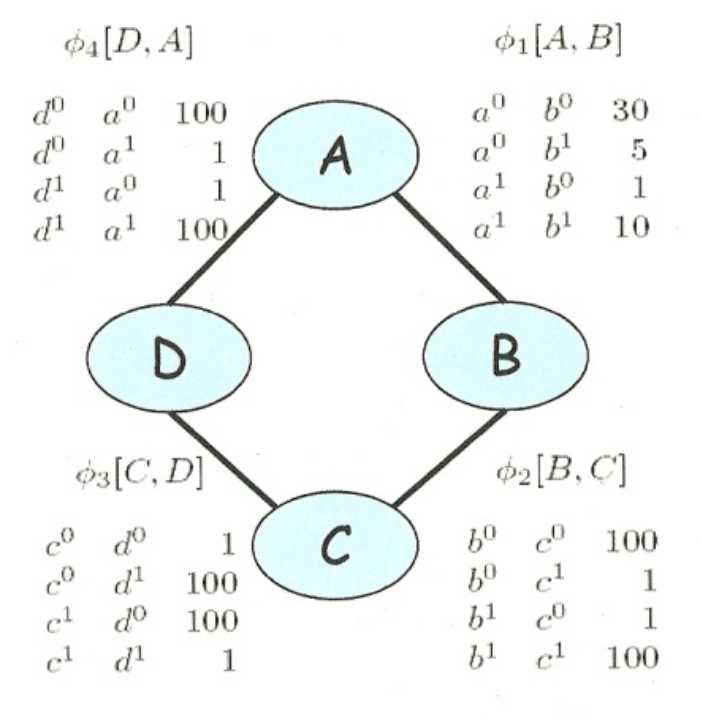

Fig 2. Simple Markov Net


In [37]:
display(Image(filename="/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/PGM/FIGS/markov_net_closeshot.png",width="25%"))
print "Fig 2. Simple Markov Net"

In [65]:
from pgmpy.models import MarkovModel
model = MarkovModel([('A','B'),('B','C')])
model.add_node('D')
model.add_edges_from([('C','D'),('D','A')])

In [66]:
phiAB = Factor(['A','B'],[2,2],[30,1,5,10])
phiBC = Factor(['B','C'],[2,2],[100,1,1,100])
phiCD = Factor(['C','D'],[2,2],[1,100,100,1])
phiDA = Factor(['D','A'],[2,2],[100,1,1,100])

In [67]:
model.add_factors(phiAB,phiBC,phiCD,phiDA) # run once, or identical factors will be added.
model.get_factors()

[<Factor representing phi(A:2, B:2) at 0x115b2b410>,
 <Factor representing phi(B:2, C:2) at 0x115b2b3d0>,
 <Factor representing phi(C:2, D:2) at 0x115b2b450>,
 <Factor representing phi(D:2, A:2) at 0x115b2b490>]

In [68]:
for factor in model.factors:
    print factor

+-----+-----+------------+
| A   | B   |   phi(A,B) |
|-----+-----+------------|
| A_0 | B_0 |    30.0000 |
| A_0 | B_1 |     1.0000 |
| A_1 | B_0 |     5.0000 |
| A_1 | B_1 |    10.0000 |
+-----+-----+------------+
+-----+-----+------------+
| B   | C   |   phi(B,C) |
|-----+-----+------------|
| B_0 | C_0 |   100.0000 |
| B_0 | C_1 |     1.0000 |
| B_1 | C_0 |     1.0000 |
| B_1 | C_1 |   100.0000 |
+-----+-----+------------+
+-----+-----+------------+
| C   | D   |   phi(C,D) |
|-----+-----+------------|
| C_0 | D_0 |     1.0000 |
| C_0 | D_1 |   100.0000 |
| C_1 | D_0 |   100.0000 |
| C_1 | D_1 |     1.0000 |
+-----+-----+------------+
+-----+-----+------------+
| D   | A   |   phi(D,A) |
|-----+-----+------------|
| D_0 | A_0 |   100.0000 |
| D_0 | A_1 |     1.0000 |
| D_1 | A_0 |     1.0000 |
| D_1 | A_1 |   100.0000 |
+-----+-----+------------+


In [75]:
import pandas as pd
import numpy as np
phiABCD = phiAB*phiBC*phiCD*phiDA
print phiABCD
print phiABCD.normalize(inplace=False)

+-----+-----+-----+-----+----------------+
| A   | B   | C   | D   |   phi(A,B,C,D) |
|-----+-----+-----+-----+----------------|
| A_0 | B_0 | C_0 | D_0 |    300000.0000 |
| A_0 | B_0 | C_0 | D_1 |    300000.0000 |
| A_0 | B_0 | C_1 | D_0 |    300000.0000 |
| A_0 | B_0 | C_1 | D_1 |        30.0000 |
| A_0 | B_1 | C_0 | D_0 |       100.0000 |
| A_0 | B_1 | C_0 | D_1 |       100.0000 |
| A_0 | B_1 | C_1 | D_0 |   1000000.0000 |
| A_0 | B_1 | C_1 | D_1 |       100.0000 |
| A_1 | B_0 | C_0 | D_0 |       500.0000 |
| A_1 | B_0 | C_0 | D_1 |   5000000.0000 |
| A_1 | B_0 | C_1 | D_0 |       500.0000 |
| A_1 | B_0 | C_1 | D_1 |       500.0000 |
| A_1 | B_1 | C_0 | D_0 |        10.0000 |
| A_1 | B_1 | C_0 | D_1 |    100000.0000 |
| A_1 | B_1 | C_1 | D_0 |    100000.0000 |
| A_1 | B_1 | C_1 | D_1 |    100000.0000 |
+-----+-----+-----+-----+----------------+
+-----+-----+-----+-----+----------------+
| A   | B   | C   | D   |   phi(A,B,C,D) |
|-----+-----+-----+-----+----------------|
| A_0 | B_0

# Conditional Random Fields (CRF)

### A. Idea

* **Definition & Example**
    * CRF is a special type of MN
    * An example of CRF would be the pixel matrix of an image, where each group of related local pixels form a superpixel which is a factor $\phi_i$ with its local pixels being the variables (i.e. $X_1,...,X_n$) in the factor.
    * Most importantly, the factor-grouping of $X_1,...,X_n$ introduces the consideration of the variables' correlation.  
    
* **Computational & Normalization**
    * $\Phi = \{\phi_1(D_1),...,\phi_k(D_k)\}$
    * $ \tilde{P}_\Phi(X,Y) = \prod_{i=1}^k\phi_i(D_i) $
    * $ Z_\Phi(X) = \sum_{Y}\tilde{P}_\Phi(X,Y) $
    * $ P(Y|X) = \frac{1}{Z_\Phi(X)}\tilde{P}_\Phi(X,Y) $

In [ ]:
# +------+----------+  --
# | x0y0 |          |   \
# +------+----------+   ---- /Z(x0) to normalize (i.e P(Y|X=x0), sum to 1)
# | x0y1 |          |   /
# +------+----------+  --
# | x1y0 |          |   \
# +------+----------+   ---- /Z(x1) to normalize (i.e. P(Y|X=x1), sum to 1)
# | x1y1 |          |   /
# +------+----------+  --

* **Logistic Model as a Special CRF**
    * $ \phi_i(X_i,Y) = exp\{w_i1\{X_i=1,Y=1\}\} $ (NB: indicator function = 1 only when $X_i=Y=1$, 0 otherwise.)
    * $ \phi_i(X_i,Y=1) = exp\{w_iX_i\} $; $ \phi_i(X_i,Y=0) = 1 $
    * $ \tilde{P}_\Phi(X,Y=1) = exp\{\sum_iw_iX_i\} $; $ \tilde{P}_\Phi(X,Y=0) = 1 $ (NB: these are basically products of the last line over $X_i, \forall i$.)
    * $ P_\Phi(Y=1|X) = \frac{exp\{\sum_iw_iX_i\}}{1 + exp\{\sum_iw_iX_i\}} $ (NB: basically $\frac{P(Y=1,X)}{P(Y=1,X)+P(Y=0,X)}$, which has a sigmoid shape.)

* **CRF in NLP**
    * Factors in the context of NLP can be anything.
    * NER example: 
        * Variables (boolean): word capitalized, word in atlas or name list, previous word is "Mrs", next word is "Times".
        * Factor: the ith NER.

* **Generative vs. Discriminative**
    * Generative: Naive Bayes, Hidden Markov Models (HMM)
    * Discriminative counterparts: Logistic Regression, CRF

### B. CRF for OCR (pystruct, sklearn)

In [ ]:
# CRF STRUCTURE
# 
# Y_i-1 ------ Y_i ------ Y_i+1  <== letter labels
#  |            |          |
# X_i-1        X_i        X_i+1  <== letter as pixel matrices
#
# the label of each letter interacts with 
#  i) pairwise potential: the neighboring letter-labels (i.e. \phiPairwise_Y_i(Y_i-1,Y_i+1) ) and
#  ii) unary potential: its pixel-matrix representation (i.e. \phiUnary_Y_i(X_i) ).

In [101]:
# FACILITIES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn.svm import LinearSVC
from pystruct.datasets import load_letters
from pystruct.models import ChainCRF # NB: require installation of cvxopt.
    # construct graph representation (structures nodes and edges).
from pystruct.learners import FrankWolfeSSVM
    # learning unary/pairwise potentials.

In [79]:
# DEMO FUNC
def plot_sample(x):
    n = len(x)
    plt.figure(1)
    for i in range(n):
        plt.subplot(100+n*10+i+1)
        plt.imshow(np.reshape(x[i],(16,8)), cmap=cm.Greys)      

In [117]:
# LOAD DATA
letters = load_letters()
    # images of words (16 x 8*k), where k is the number of letters in a word.
    # to see an example, plot: l = letters.items()[0] ... plt.imshow(l[1][0]).
X, Y, folds = letters['data'], letters['labels'], letters['folds']
    # data: pixel matrixs of word-images.
    # labels: letter sequences, coded in ints.
    # folds: train/test split indices.
X, Y = np.array(X), np.array(Y)
X_train, X_test = X[folds==1], X[folds!=1]
Y_train, Y_test = Y[folds==1], Y[folds!=1]

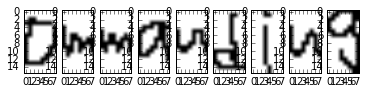

In [118]:
plot_sample(X_train[0])

In [167]:
%%time
# BUILDING & TRAINING MODEL
model = ChainCRF()                                     # <== model
ssvm = FrankWolfeSSVM(model=model, C=.1, max_iter=100)  # <== learner
ssvm.fit(X_train, Y_train)                             # <== inference fitting
''' produces...
FrankWolfeSSVM(C=0.1, batch_mode=False, check_dual_every=10,
        do_averaging=True, line_search=True, logger=None, max_iter=11,
        model=ChainCRF(n_states: 26, inference_method: max-product),
        n_jobs=1, random_state=None, sample_method='perm',
        show_loss_every=0, tol=0.001, verbose=0)
'''

CPU times: user 29.9 s, sys: 40.8 ms, total: 29.9 s
Wall time: 29.9 s


In [168]:
# NUMBER OF PARAMETERS
print "Total number of weights: ", len(ssvm.w)
print "Number of Weights for Unary Potentials: ", (16*8) * 26
    #                                                ^     ^
    #                                                |     |
    #                            pixels for each letter  number of letters
print "Number of Weights for Pairwise Potentials:", (26 * 26)
    #                                                ^     ^
    #                                                |     |
    #                                        letter_i-1   letter_i+1

Total number of weights:  4004
Number of Weights for Unary Potentials:  3328
Number of Weights for Pairwise Potentials: 676


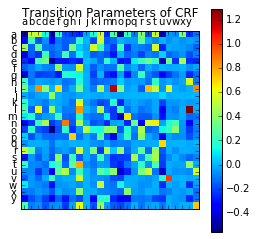

In [169]:
# VISUALIZING PAIRWISE POTENTIALS
abc = "abcdefghijklmnopqrstuvwxyz"
plt.matshow(ssvm.w[(16*8)*26:].reshape(26,26)) 
    # take the subset of weights which are for pairwise potentials.
plt.colorbar()
plt.title("Transition Parameters of CRF")
plt.xticks(np.arange(25),abc)
plt.yticks(np.arange(25),abc)
plt.show()
    # e.g. i is very likely to be followed by n.

In [170]:
# EVALUATION
totalNumberOfLetters = len(Y_test)*9.
Y_test_hat = ssvm.predict(X_test)
correct = 0.
for i in xrange(len(Y_test)):
    correct += sum(Y_test_hat[i]==Y_test[i])
print "Accuracy: {}%".format((correct/totalNumberOfLetters)*100)

Accuracy: 66.1878791151%
